In [1]:
using RepeatedSolvers
using PyPlot
matplotlib[:rcdefaults]()

Example is groundstate of simple particle-in-a-box.

Define grid:

In [2]:
L = 1
N = 29
dx = L/(N+1)
x = (1:N)*dx

0.03333333333333333:0.03333333333333333:0.9666666666666667

Define Hamiltonian as one-dimensional Laplacian:

In [3]:
H = Tridiagonal(ones(N-1), -2ones(N), ones(N-1))/dx^2

29x29 Tridiagonal{Float64}:
 -1800.0    900.0      0.0      0.0  …      0.0      0.0      0.0      0.0
   900.0  -1800.0    900.0      0.0         0.0      0.0      0.0      0.0
     0.0    900.0  -1800.0    900.0         0.0      0.0      0.0      0.0
     0.0      0.0    900.0  -1800.0         0.0      0.0      0.0      0.0
     0.0      0.0      0.0    900.0         0.0      0.0      0.0      0.0
     0.0      0.0      0.0      0.0  …      0.0      0.0      0.0      0.0
     0.0      0.0      0.0      0.0         0.0      0.0      0.0      0.0
     0.0      0.0      0.0      0.0         0.0      0.0      0.0      0.0
     0.0      0.0      0.0      0.0         0.0      0.0      0.0      0.0
     0.0      0.0      0.0      0.0         0.0      0.0      0.0      0.0
     0.0      0.0      0.0      0.0  …      0.0      0.0      0.0      0.0
     0.0      0.0      0.0      0.0         0.0      0.0      0.0      0.0
     0.0      0.0      0.0      0.0         0.0      0.0      0.0      0

Find eigenstates:

In [4]:
ψ₀ = convert(Vector{Complex128}, eigs(H)[2][:,1])

29-element Array{Complex{Float64},1}:
 -0.0269891+0.0im
  0.0536826+0.0im
 -0.0797878+0.0im
   0.105019+0.0im
  -0.129099+0.0im
   0.151765+0.0im
  -0.172769+0.0im
   0.191879+0.0im
  -0.208887+0.0im
   0.223607+0.0im
  -0.235876+0.0im
   0.245562+0.0im
  -0.252557+0.0im
           ⋮     
   0.245562+0.0im
  -0.235876+0.0im
   0.223607+0.0im
  -0.208887+0.0im
   0.191879+0.0im
  -0.172769+0.0im
   0.151765+0.0im
  -0.129099+0.0im
   0.105019+0.0im
 -0.0797878+0.0im
  0.0536826+0.0im
 -0.0269891+0.0im

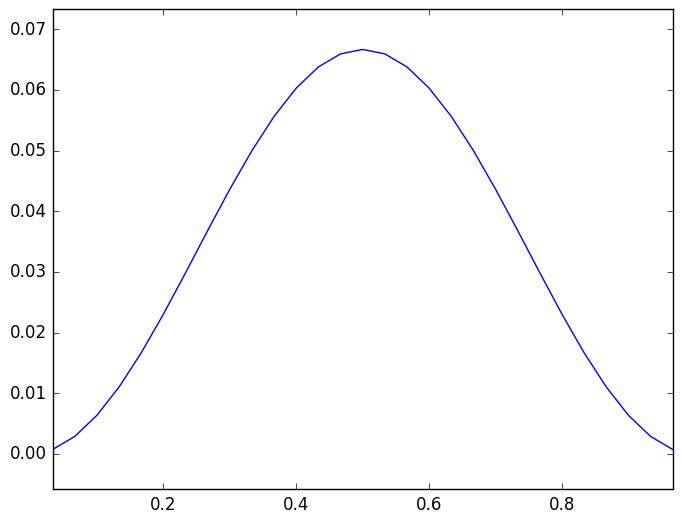

In [5]:
figure()
plot(x,abs2(ψ₀))
margins(0,0.1)
gcf()

In [6]:
t = linspace(0,1,1001)
dt = t[2]-t[1]

0.001

The direct solver is unconditionally stable, the implementation of the Jacobi solver requires $\mu$ small ($\lesssim5$).

In [7]:
μ = dt/dx^2

0.9

Crank–Nicolson propagator:

In [8]:
I = Diagonal(ones(N))
F = I - im*dt/2*H
B = I + im*dt/2*H

function step(x, solver)
    x[:] = F*x
    solve!(x, solver)
end

step (generic function with 1 method)

Test propagation:

  0.068155 seconds (57.24 k allocations: 2.973 MB)
  3.845493 seconds (24.29 M allocations: 4.455 GB, 8.15% gc time)


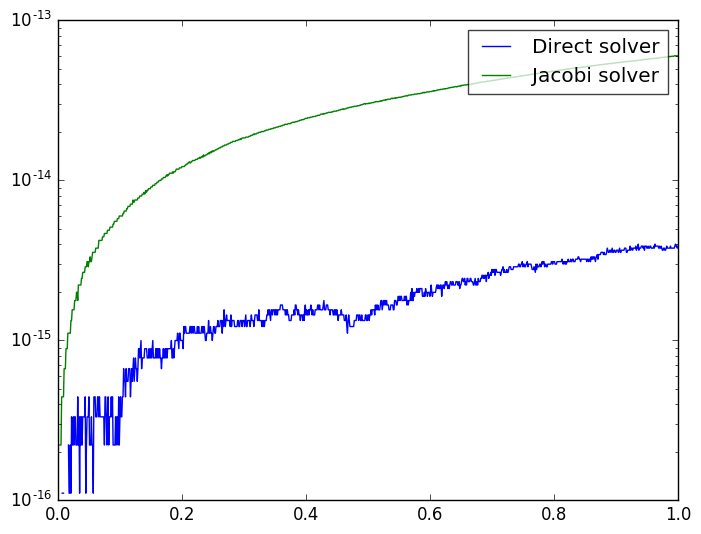

In [9]:
figure()

for solver = [DirectSolver(B), JacobiSolver(B, 1e-16, 2./3, 1000)]
    e = eigs(H)
    x = convert(Vector{Complex128},e[2][:,1])
    x /= norm(x)

    n = ones(length(t))

    @time for i = 2:length(t)
        step(x, solver)
        n[i] = norm(x)
    end

    semilogy(t, abs(1.0-n))
end
legend(["Direct solver", "Jacobi solver"], framealpha=0.75)
gcf()